In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img_2d = np.array(Image.open('Lenna.png'))

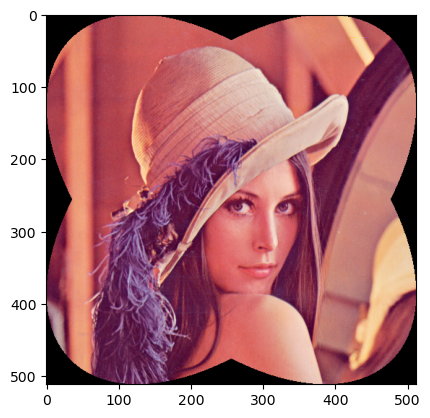

In [20]:
def elliptical_crop(img_2d):
    h, w = img_2d.shape[:2]
    center = (h // 2, w // 2)

    # for 1x1 square
    a = 0.35
    b = 0.61375
    
    # for h x w square
    new_a = a * h
    new_b = b * w
    
    Y, X = np.ogrid[:h, :w]
    
    const_1 = 1 / new_a**2 + 1 / new_b**2
    const_2 = 1 / new_a**2 - 1 / new_b**2
    
    mask_l = const_1 * ((X - center[1])**2 + (Y - center[0])**2) - const_2 * 2 * (X - center[1]) * (Y - center[0]) > 2
    mask_r = const_1 * ((X - center[1])**2 + (Y - center[0])**2) + const_2 * 2 * (X - center[1]) * (Y - center[0]) > 2
    
    new_img_2d = img_2d.copy()
    new_img_2d[mask_l & mask_r] = 0
    
    return new_img_2d
plt.imshow(elliptical_crop(img_2d))

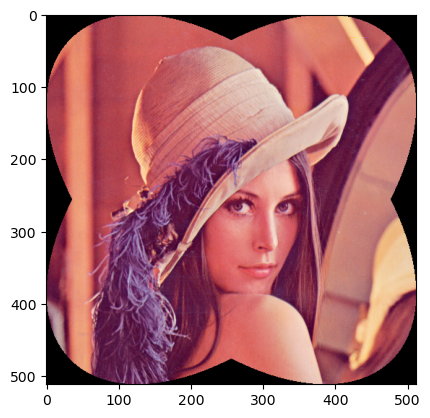